Точность: 0.9647421771705598


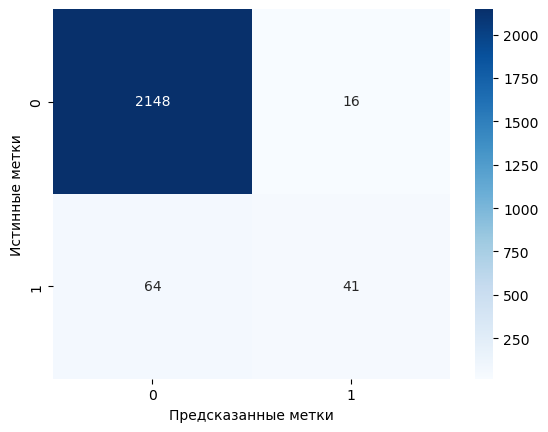

Игра является непопулярной


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('appstore_games.csv')

# Предобработка данных
data = data[['Average User Rating', 'User Rating Count', 'Size', 'Genres']]
data = data.dropna()

# Создание бинарного признака "Популярная" или "Непопулярная"
data['is_popular'] = data['User Rating Count'].apply(lambda x: 1 if x >= 10000 else 0)

# One-Hot-Encoding категориального признака "Жанры"
data_encoded = pd.get_dummies(data, columns=['Genres'])

# Разделение данных на обучающую и тестовую выборки
X = data_encoded.drop(['is_popular'], axis=1)
y = data_encoded['is_popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение классификатора
clf = GaussianNB()
clf.fit(X_train, y_train)

# Предсказание
y_pred = clf.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy}')

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

# Вводим данные для проверки
test_game_genre = "Strategy" 
test_game_avg_rating = 4.5  
test_game_votes = 5000  
test_game_size = 100  

# Преобразование данных
test_game_data = pd.DataFrame({"Genres": [test_game_genre],
                               "Average User Rating": [test_game_avg_rating],
                               "User Rating Count": [test_game_votes],
                               "Size": [test_game_size]})

test_game_data_encoded = pd.get_dummies(test_game_data, columns=["Genres"])
test_game_data_encoded = test_game_data_encoded.reindex(columns=X.columns, fill_value=0)

# Предсказание
popularity_prediction = clf.predict(test_game_data_encoded)

if popularity_prediction[0] == 1:
    print("Игра является популярной")
else:
    print("Игра является непопулярной")